In [1]:
from tuw_nlp.grammar.text_to_4lang import TextTo4lang
from tuw_nlp.graph.utils import graph_to_pn

## 1. General usage

### Initialize TextTo4lang

The parameters are `language`, `nlp_cache`, `cache_dir`

In [ ]:
tfl = TextTo4lang("en", "en_nlp_cache")

### Parsing a sentence

`TextTo4lang` can be called with a context manager, it only has 1 required parameter, the `text` itself:

In [3]:
fl_graphs = list(tfl("Yellow hat"))

### Displaying the graph

The `FourLang` can be converted to a dot format, which can be visualized with the graphviz package

In [5]:
from tuw_nlp.graph.fourlang import FourLang
from graphviz import Source

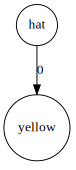

In [5]:
Source(FourLang(fl_graphs[0], None).to_dot())

In [4]:
tfl.lexicon.get_definition("brown")

'A colour like that of chocolate or coffee.'

## 2. Expanding and Reducing a sentence

`TextTo4lang` has two optional parameters, `depth`, which indicates the recursion depth when expanding the graph, and `substitute`, which can be used to reduce the vocabulary of the graph by substituting the _expanded_ node with the root of its definition graph.

The default value for `depth` is 0, and `substitute` is set to _False_ by default.

In [13]:
fl_graphs = list(tfl("brown dog", depth=1, substitute=False))

In [14]:
fl_graphs[0].nodes(data=True)

NodeDataView({2: {'name': 'dog', 'expanded': True}, 3: {'name': 'brown', 'expanded': True}, 4: {'name': 'appearance'}, 5: {'name': 'variable'}, 6: {'name': 'highly'}, 7: {'name': 'PERIOD'}, 8: {'name': 'breeding'}, 9: {'name': 'due'}, 10: {'name': 'to'}, 11: {'name': 'human'}, 12: {'name': 'of'}, 13: {'name': 'COMMA'}, 14: {'name': 'mammal'}, 15: {'name': 'domesticate'}, 16: {'name': 'be'}, 17: {'name': 'have'}, 18: {'name': 'for'}, 19: {'name': 'thousand'}, 20: {'name': 'year'}, 21: {'name': 'a'}, 22: {'name': 'familiaris'}, 23: {'name': 'lupus'}, 24: {'name': 'Canis'}, 25: {'name': 'colour'}, 26: {'name': 'that'}, 27: {'name': 'chocolate'}, 28: {'name': 'coffee'}, 29: {'name': 'or'}, 30: {'name': 'like'}})

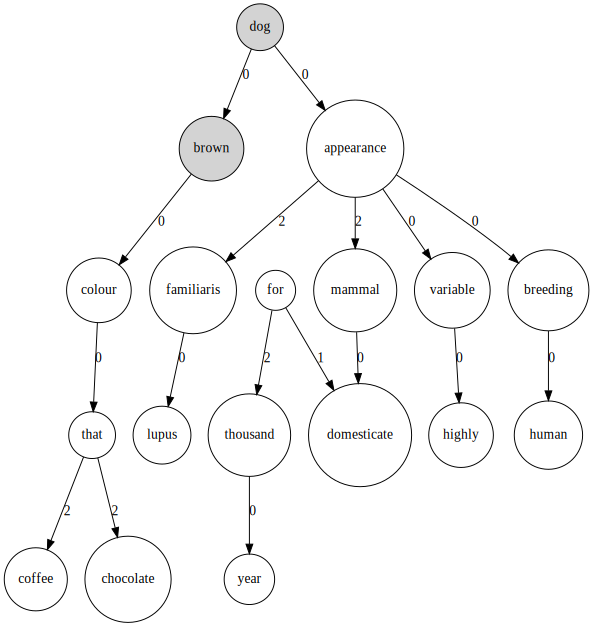

In [15]:
Source(FourLang(fl_graphs[0], None).to_dot())

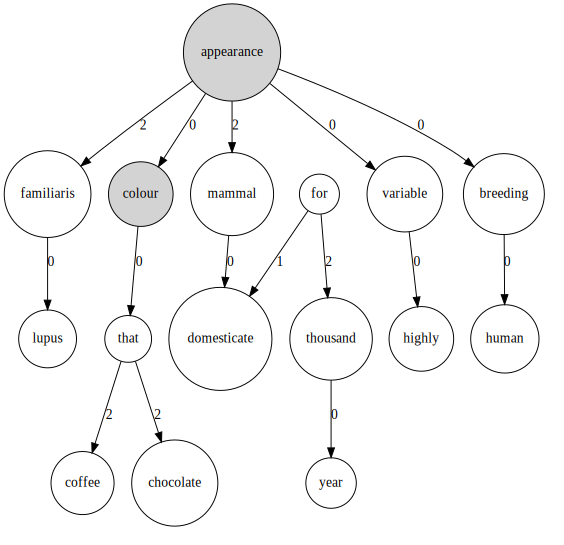

In [16]:
fl_graphs = list(tfl("brown dog", depth=1, substitute=True))
Source(FourLang(fl_graphs[0], None).to_dot())

## 3. Using another language

Currently, besides English, TextTo4lang can be used with German as well

In [ ]:
tfl = TextTo4lang("de", "de_nlp_cache")

In [20]:
fl_graphs = list(tfl("brauner Hund", depth=1, substitute=False))

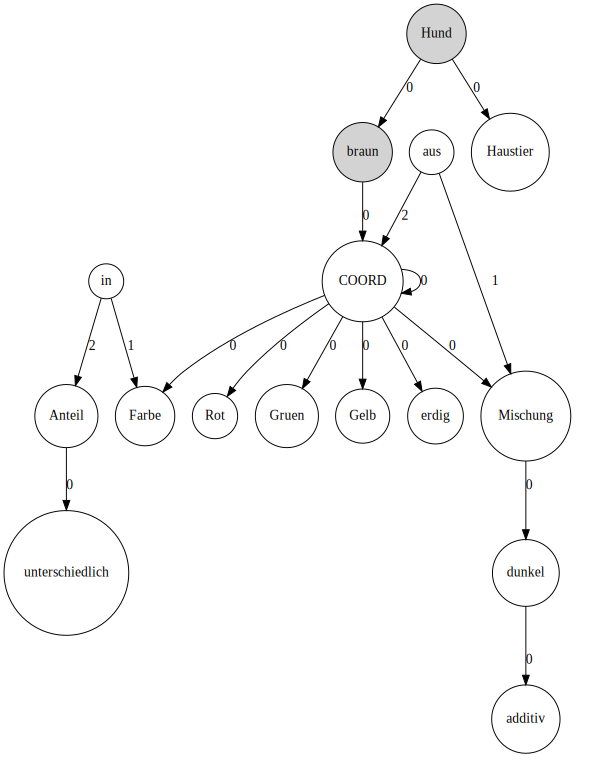

In [21]:
Source(FourLang(fl_graphs[0], None).to_dot())

In [74]:
tfl.lexicon.get_definition("braun")

'erdige Farbe, additiv dunkle Mischungen aus Gelb, Rot und Grün in unterschiedlichen Anteilen'